In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('CheckPyspark').master("local").getOrCreate()
#spark
sdf = spark.read.csv("Churn_modelling.csv", header=True, inferSchema=True)
#pd.DataFrame(df.take(5), columns=df.columns).transpose()
sdf.show(1)

+---------+----------+--------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId| Surname|CreditScore|Geography|Gender|Age|Tenure|Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+--------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
|        1|  15634602|Hargrave|        619|   France|Female| 42|     2|    0.0|            1|        1|             1|      101348.88|     1|
+---------+----------+--------+-----------+---------+------+---+------+-------+-------------+---------+--------------+---------------+------+
only showing top 1 row



# Use Spark SQL to filter data

In [6]:
sdf.createOrReplaceTempView("sales")
output =  spark.sql("SELECT Geography,CreditScore,CustomerId,Age from sales where   CreditScore<600 ")
output.show()

+---------+-----------+----------+---+
|Geography|CreditScore|CustomerId|Age|
+---------+-----------+----------+---+
|   France|        502|  15619304| 42|
|  Germany|        376|  15656148| 29|
|   France|        501|  15792365| 44|
|   France|        528|  15767821| 31|
|    Spain|        497|  15737173| 24|
|   France|        476|  15632264| 34|
|   France|        549|  15691483| 25|
|    Spain|        549|  15788218| 24|
|    Spain|        587|  15661507| 45|
|    Spain|        510|  15699309| 38|
|   France|        577|  15738191| 25|
|   France|        571|  15700772| 44|
|  Germany|        574|  15728693| 43|
|   France|        411|  15656300| 29|
|    Spain|        591|  15589475| 39|
|   France|        533|  15706552| 36|
|  Germany|        553|  15750181| 41|
|    Spain|        520|  15659428| 42|
|   France|        475|  15794171| 45|
|    Spain|        490|  15788448| 31|
+---------+-----------+----------+---+
only showing top 20 rows



In [9]:
output =  spark.sql("SELECT Geography,CreditScore from sales where   CreditScore<600 group by 1,2")
output.show()

+---------+-----------+
|Geography|CreditScore|
+---------+-----------+
|   France|        567|
|   France|        410|
|  Germany|        578|
|  Germany|        425|
|  Germany|        471|
|  Germany|        455|
|  Germany|        520|
|    Spain|        489|
|   France|        373|
|    Spain|        597|
|    Spain|        595|
|    Spain|        596|
|   France|        447|
|  Germany|        436|
|   France|        515|
|   France|        461|
|  Germany|        548|
|    Spain|        559|
|  Germany|        598|
|  Germany|        565|
+---------+-----------+
only showing top 20 rows



In [15]:
bh1 = sdf.groupBy('Geography').count()
print(bh1.show())

+---------+-----+
|Geography|count|
+---------+-----+
|  Germany| 2509|
|   France| 5014|
|    Spain| 2477|
+---------+-----+

None


In [20]:
sdf.select("Geography", "CreditScore").filter("CreditScore = 619").show(1)
#or
# sdf.select(sdf.Geography, sdf.CreditScore).filter("CreditScore = 619").show()

+---------+-----------+
|Geography|CreditScore|
+---------+-----------+
|   France|        619|
+---------+-----------+
only showing top 1 row



In [23]:
sdf.select("Geography", "CreditScore").filter("CreditScore like '%4%'").show(5)

+---------+-----------+
|Geography|CreditScore|
+---------+-----------+
|    Spain|        645|
|   France|        684|
|    Spain|        497|
|   France|        476|
|   France|        549|
+---------+-----------+
only showing top 5 rows



In [28]:
#IT WILL SHOW ALL COLUMN
sdf.filter((sdf.Geography.like('%F%')) & (sdf.CreditScore=='619')).show(3)

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|        1|  15634602| Hargrave|        619|   France|Female| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|       56|  15760861|Phillipps|        619|   France|  Male| 43|     1|125211.92|            1|        1|             1|      113410.49|     0|
|      936|  15675316|  Avdeeva|        619|   France|Female| 38|     3|      0.0|            2|        0|             1|      116467.35|     0|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------

In [16]:
from pyspark.sql.functions import *
count_df = sdf.groupBy('Exited').count()  # to check balance vs unbalanced dataset
count_df.show()


+------+-----+
|Exited|count|
+------+-----+
|     1| 2037|
|     0| 7963|
+------+-----+



In [3]:
import numpy as np
import matplotlib.pyplot as plt
#pip install matplotlib

([<matplotlib.axis.XTick at 0x1eec0dcbfa0>,
 [Text(0.175, 0, '1'), Text(1.175, 0, '0')])

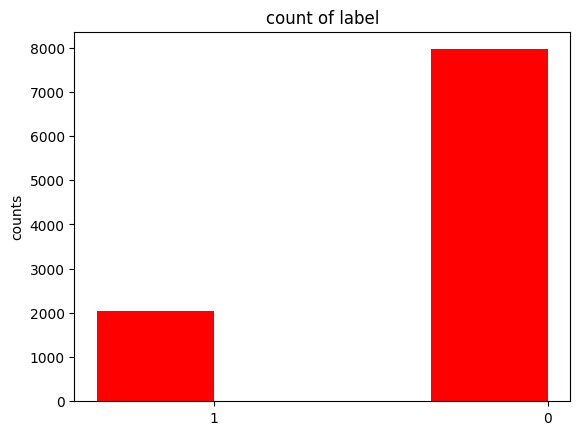

In [4]:
label_count = sdf.groupBy('Exited').count().collect()
categories = [i[0] for i in label_count]
counts = [i[1] for i in label_count]
 
ind = np.array(range(len(categories)))
width = 0.35
plt.bar(ind, counts, width=width, color='r')
 
plt.ylabel('counts')
plt.title('count of label')
plt.xticks(ind + width/2., categories)

# label_counts = sdf.groupBy("Exited").count().orderBy("count", ascending=False).collect()
# category_names = [row[0] for row in label_counts]
# category_values = [row[1] for row in label_counts]
# plt.bar(category_names, category_values)
# plt.xlabel("Exited")
# plt.ylabel("Count")
# plt.title("label Counts")
# plt.show()

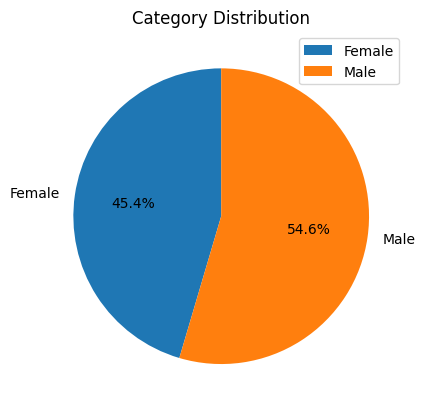

In [5]:
gender_count = sdf.groupBy("Gender").count().collect()
labels = [str(row[0]) for row in gender_count]     # Convert category_counts to two separate lists for labels and values
values = [int(row[1]) for row in gender_count]
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Category Distribution")
plt.legend()
plt.show()


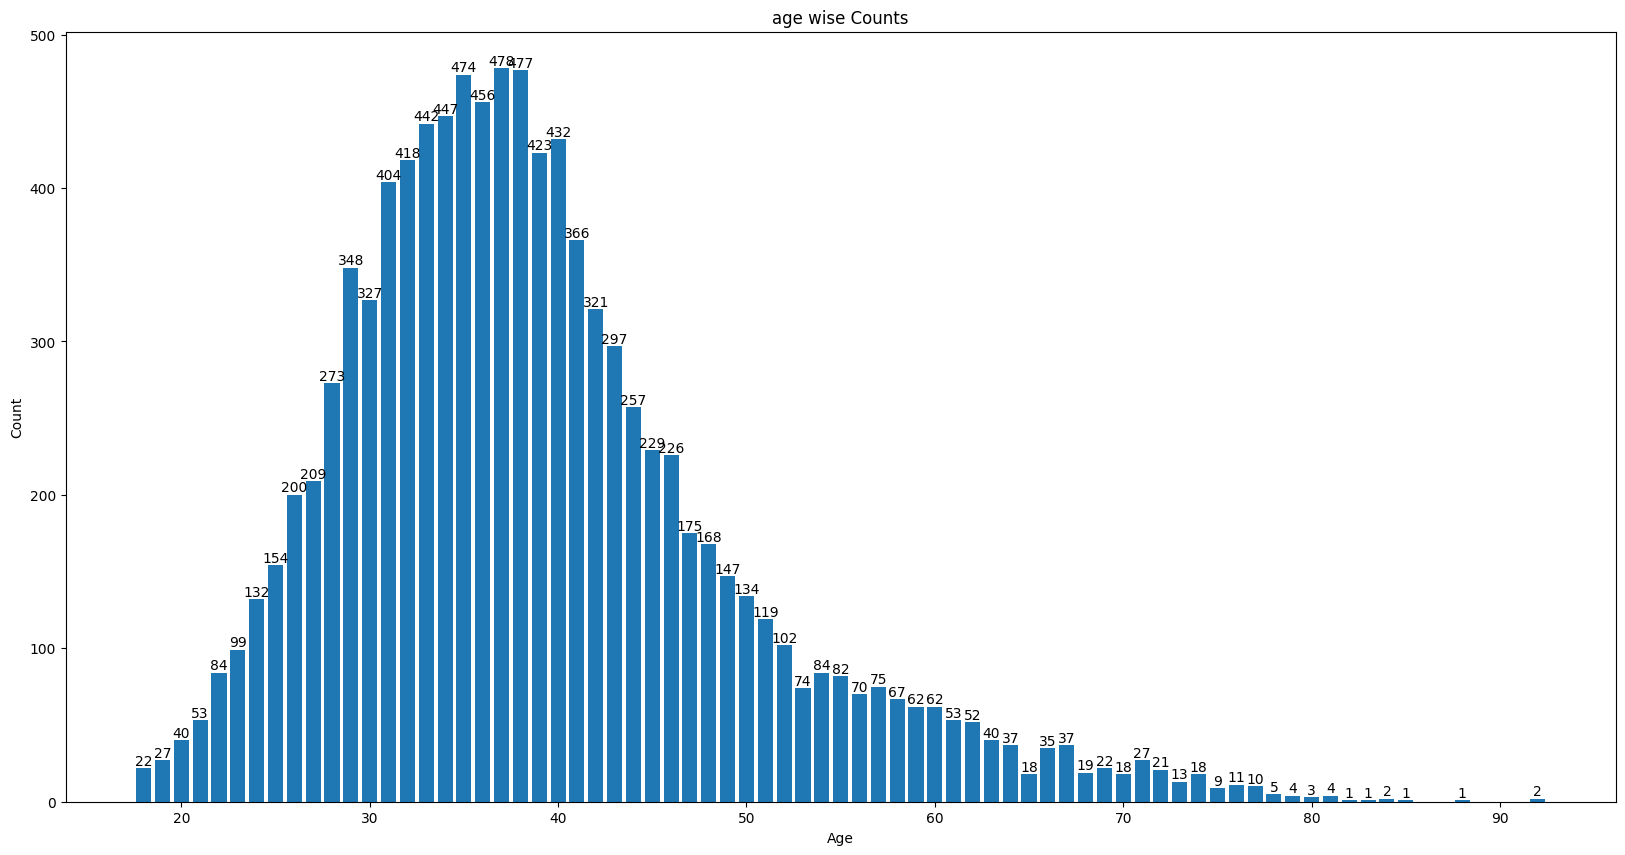

In [6]:
age_counts = sdf.groupBy("Age").count().orderBy("count", ascending=False).collect()
category_names = [row[0] for row in age_counts]
category_values = [row[1] for row in age_counts]
fig, ax = plt.subplots(figsize=(20, 10))           # to change width n height of graph
bar=plt.bar(category_names, category_values)
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.set_title("age wise Counts")
for b in bar:
    height = b.get_height()
    ax.text(b.get_x() + b.get_width() / 2, height, str(int(height)), ha="center", va="bottom")
plt.show()

In [7]:
#sdf.na.drop(how="any").show(truncate=False)
sdf.dropna().show(truncate=False)

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|RowNumber|CustomerId|Surname  |CreditScore|Geography|Gender|Age|Tenure|Balance  |NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+
|1        |15634602  |Hargrave |619        |France   |Female|42 |2     |0.0      |1            |1        |1             |101348.88      |1     |
|2        |15647311  |Hill     |608        |Spain    |Female|41 |1     |83807.86 |1            |0        |1             |112542.58      |0     |
|3        |15619304  |Onio     |502        |France   |Female|42 |8     |159660.8 |3            |1        |0             |113931.57      |1     |
|4        |15701354  |Boni     |699        |France   |Female|39 |1     |0.0      |2            |0        |0             |93826.63 

In [8]:
#from pyspark.sql.functions import col, when, count
#sdf.select([count(when(col(c).isNotNull() , c)).alias(c) for c in sdf.columns]).show()

In [9]:
sdf.printSchema()

root
 |-- RowNumber: integer (nullable = true)
 |-- CustomerId: integer (nullable = true)
 |-- Surname: string (nullable = true)
 |-- CreditScore: integer (nullable = true)
 |-- Geography: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Tenure: integer (nullable = true)
 |-- Balance: double (nullable = true)
 |-- NumOfProducts: integer (nullable = true)
 |-- HasCrCard: integer (nullable = true)
 |-- IsActiveMember: integer (nullable = true)
 |-- EstimatedSalary: double (nullable = true)
 |-- Exited: integer (nullable = true)



# convert categorical data into vector

In [11]:
from pyspark.ml.feature import StringIndexer

In [12]:
categoricalColumns = ["Geography"]
l = []

for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol+"_encoded").fit(sdf)

sdf = stringIndexer.transform(sdf)

sdf = sdf.withColumn(categoricalCol+"_encoded", sdf[categoricalCol+"_encoded"].cast('int')) #StringIndexer returns the data in float format, so in the next step, we have Performed casting and converted float values into Numerical. 



In [13]:
encoded_df =  sdf.select('CreditScore',"Geography_encoded",'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited')
encoded_df.show()

+-----------+-----------------+-----------+---+------+---------+-------------+---------+--------------+---------------+------+
|CreditScore|Geography_encoded|CreditScore|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|
+-----------+-----------------+-----------+---+------+---------+-------------+---------+--------------+---------------+------+
|        619|                0|        619| 42|     2|      0.0|            1|        1|             1|      101348.88|     1|
|        608|                2|        608| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|
|        502|                0|        502| 42|     8| 159660.8|            3|        1|             0|      113931.57|     1|
|        699|                0|        699| 39|     1|      0.0|            2|        0|             0|       93826.63|     0|
|        850|                2|        850| 43|     2|125510.82|            1|        1|             1|        

# feature extraction using VectorAssembler
#### convert all the independent columns into one feature using VectorAssembler. The feature created is used for training.

In [14]:
from pyspark.ml.feature import VectorAssembler,Normalizer,StandardScaler

In [15]:
bholuAssembler = VectorAssembler(inputCols=['CreditScore',"Geography_encoded",'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'],outputCol="features")
bholu = bholuAssembler.transform(encoded_df)
bholu.select("features","Exited").show(5)

+--------------------+------+
|            features|Exited|
+--------------------+------+
|[619.0,0.0,619.0,...|     1|
|[608.0,2.0,608.0,...|     0|
|[502.0,0.0,502.0,...|     1|
|[699.0,0.0,699.0,...|     0|
|[850.0,2.0,850.0,...|     0|
+--------------------+------+
only showing top 5 rows



In [16]:
#scaler = StandardScaler(inputCol="features", outputCol="normalized_features", withStd=True, withMean=True)
#scalerModel = scaler.fit(sdf)
#scaledData = scalerModel.transform(sdf)

normalizer = Normalizer(inputCol="features", outputCol="normalized_features", p=2.0)
df_normalized = normalizer.transform(bholu)
df_normalized.select("normalized_features").show(5)

+--------------------+
| normalized_features|
+--------------------+
|[0.00610738724885...|
|[0.00433288411597...|
|[0.00255934379577...|
|[0.00744949645256...|
|[0.00572956505309...|
+--------------------+
only showing top 5 rows



# split the data for training and testing.

In [17]:
train, test = df_normalized.randomSplit([0.9, 0.1], seed=1700)

In [18]:
print('size of training data',train.count())
print('size of testing data',test.count())

size of training data 9025
size of testing data 975


In [19]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression(featuresCol = 'normalized_features', labelCol = 'Exited', maxIter=10)
lrModel = lr.fit(train)

predictions23 = lrModel.transform(test)        #predict the test data
predictions_train=lrModel.transform(train)   ##predict the train data
#predictions.show(truncate=2)                #print prediction of  test data
#predictions_train.show(truncate=2)
predictions23.select('CreditScore',"Geography_encoded",'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited','features','rawPrediction','probability','prediction').toPandas().head(1)

,CreditScore,Geography_encoded,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,features,rawPrediction,probability,prediction
0,363,2,363,28,6,146098.43,3,1,0,100615.14,1,"[363.0, 2.0, 363.0, 28.0, 6.0, 146098.43, 3.0,...","[1.1898468834838123, -1.1898468834838123]","[0.7667136783429497, 0.23328632165705032]",0.0


In [20]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator   #
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator40 = BinaryClassificationEvaluator(labelCol="Exited", rawPredictionCol="prediction",metricName='areaUnderROC')
auc = evaluator40.evaluate(predictions23)
print('AUC:', auc)

AUC: 0.5062202319634481


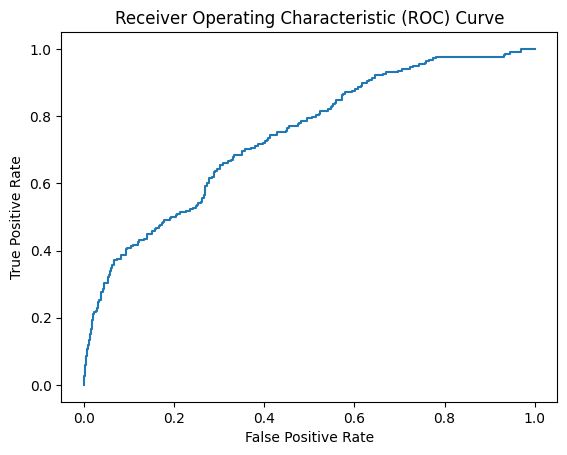

In [21]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import pandas as pd

preds = predictions23.select('Exited', 'probability').toPandas() # convert PySpark DataFrame to Pandas DataFrame
fpr, tpr, thresholds = roc_curve(preds['Exited'], preds['probability'].apply(lambda x: x[1]))# compute false positive rate, true positive rate, and thresholds
plt.plot(fpr, tpr)
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


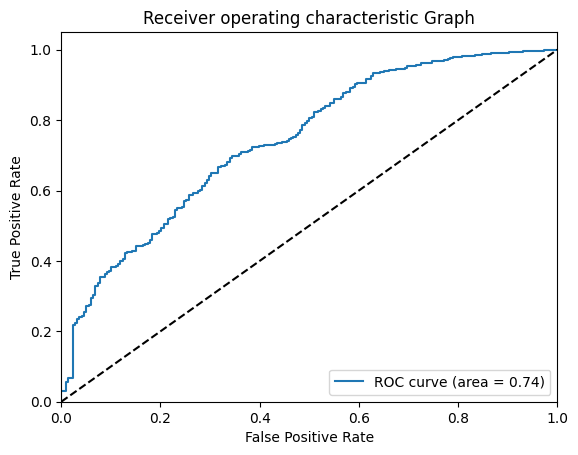

In [24]:
from sklearn.metrics import roc_curve, auc
from pyspark.mllib.evaluation import BinaryClassificationMetrics as metric

results = predictions23.select(['probability', 'Exited'])
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]

fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()

In [25]:
evaluator12 = MulticlassClassificationEvaluator(predictionCol="prediction", labelCol="Exited", metricName="f1")
f1_score = evaluator12.evaluate(predictions23)  #because data is highly un-balanced
print("F1 score: %.4f" % f1_score)

F1 score: 0.6854


In [26]:
accuracy = predictions23.filter(predictions23.Exited == predictions23.prediction).count() / float(predictions23.count())
print("Accuracy : ",accuracy)


Accuracy :  0.7784615384615384


# check which algo is best on our dataset


In [28]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, GBTClassifier, NaiveBayes
#from pyspark.ml.classification import AdaBoostClassifier,XGBoostClassifier,XGBRFClassifier


models={'Logistic_regression': LogisticRegression(),
       'Tree': DecisionTreeClassifier(),
       'Random_forest': RandomForestClassifier(),
        'GBT': GBTClassifier(),
        'NB': NaiveBayes() }


model1 = LogisticRegression(featuresCol = 'normalized_features', labelCol = 'Exited', maxIter=10).fit(train)
model2=DecisionTreeClassifier(featuresCol = 'normalized_features', labelCol = 'Exited').fit(train)
model3=RandomForestClassifier(featuresCol = 'normalized_features', labelCol = 'Exited').fit(train)
model4=GBTClassifier(featuresCol = 'normalized_features', labelCol = 'Exited').fit(train)
model5=NaiveBayes(featuresCol = 'normalized_features', labelCol = 'Exited').fit(train)

predictions1 = model1.transform(test)              # Make predictions on test set
predictions2 = model2.transform(test)
predictions3 = model3.transform(test)
predictions4 = model4.transform(test)
predictions5 = model5.transform(test)
#predictions1.show(truncate=2) 

predictions1_train = model1.transform(train)        # Make predictions on train set
predictions2_train = model2.transform(train)
predictions3_train = model3.transform(train)
predictions4_train = model4.transform(train)
predictions5_train = model5.transform(train)
#predictions1_train.show(truncate=2)

#evaluator1 = BinaryClassificationEvaluator(labelCol="Exited", rawPredictionCol="predictions")    #for ROC 
#print( 'test area under ROC',evaluator1.evaluate(predictions1))

accuracy1 = predictions1.filter(predictions1.Exited == predictions1.prediction).count() / float(predictions1.count())
accuracy2 = predictions2.filter(predictions2.Exited == predictions2.prediction).count() / float(predictions2.count())
accuracy3 = predictions3.filter(predictions3.Exited == predictions3.prediction).count() / float(predictions3.count())
accuracy4 = predictions4.filter(predictions4.Exited == predictions4.prediction).count() / float(predictions4.count())
accuracy5 = predictions5.filter(predictions5.Exited == predictions5.prediction).count() / float(predictions5.count())
print("Accuracy of LogisticRegression : ",accuracy1)
print("Accuracy of DecisionTreeClassifier: ",accuracy2)
print("Accuracy of RandomForestClassifier: ",accuracy3)
print("Accuracy of GBTClassifier: ",accuracy4)
print("Accuracy of NaiveBayes: ",accuracy5)

Accuracy of LogisticRegression :  0.7784615384615384
Accuracy of DecisionTreeClassifier:  0.8174358974358974
Accuracy of RandomForestClassifier:  0.7979487179487179
Accuracy of GBTClassifier:  0.8338461538461538
Accuracy of NaiveBayes:  0.7764102564102564


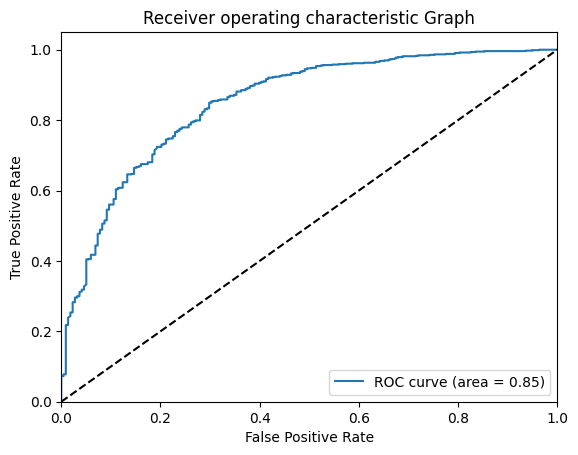

In [29]:
results = predictions4.select(['probability', 'Exited'])
results_collect = results.collect()
results_list = [(float(i[0][0]), 1.0-float(i[1])) for i in results_collect]

fpr = dict()
tpr = dict()
roc_auc = dict()
 
y_test = [i[1] for i in results_list]
y_score = [i[0] for i in results_list]
 
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
 
%matplotlib inline
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic Graph')
plt.legend(loc="lower right")
plt.show()